In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy import stats as sts

In [2]:
df = pd.read_csv('data/incidentes-viales-c5-limpio.csv', sep="$", index_col=0)

In [3]:
df.tail()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,fecha_hora_cierre,fecha_hora_creacion
693675,C5/210228/09218,N,MIGUEL HIDALGO,accidente-motociclista,19.392430,-99.239100,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,2,2021-02-28 22:50:09,2021-02-28 22:23:07
693688,C5/210228/09309,N,IZTAPALAPA,accidente-choque sin lesionados,19.349940,-99.066890,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,2,2021-02-28 23:44:19,2021-02-28 22:24:48
693689,C5/210228/09401,N,GUSTAVO A. MADERO,lesionado-atropellado,19.491660,-99.092150,URGENCIAS MEDICAS,LLAMADA DEL 911,GUSTAVO A. MADERO,2,2021-02-28 22:58:58,2021-02-28 22:45:49
693691,C5/210228/09417,A,AZCAPOTZALCO,accidente-choque sin lesionados,19.481660,-99.218560,EMERGENCIA,LLAMADA DEL 911,AZCAPOTZALCO,2,2021-02-28 23:48:19,2021-02-28 22:48:36
693692,IZ/210228/07916,A,XOCHIMILCO,accidente-choque sin lesionados,19.244195,-99.108017,EMERGENCIA,BOTÓN DE AUXILIO,XOCHIMILCO,2,2021-02-28 20:17:58,2021-02-28 19:46:33


In [4]:
df.shape

(369280, 12)

In [5]:
df.dtypes

folio                   object
codigo_cierre           object
delegacion_inicio       object
incidente_c4            object
latitud                float64
longitud               float64
clas_con_f_alarma       object
tipo_entrada            object
delegacion_cierre       object
mes                      int64
fecha_hora_cierre       object
fecha_hora_creacion     object
dtype: object

In [6]:
diccionario_de_conversion = {
    'codigo_cierre': 'category',
    'fecha_hora_creacion': 'datetime64[ns]',
    'fecha_hora_cierre': 'datetime64[ns]', 
    'delegacion_inicio': 'category',
    'incidente_c4': 'category', 
    'clas_con_f_alarma': 'category', 
    'tipo_entrada': 'category',
    'delegacion_cierre':'category',
    'mes':'category'
}

In [7]:
df = df.astype(diccionario_de_conversion)

In [8]:
df.describe()

,latitud,longitud
count,369280.000000,369280.000000
mean,19.382307,-99.137894
std,0.069267,0.062467
min,19.095427,-99.370561
25%,19.335590,-99.180590
50%,19.383290,-99.141057
75%,19.433160,-99.096370
max,19.579320,-98.945370


In [9]:
df['tiempo_atencion'] = (df['fecha_hora_cierre'] - df['fecha_hora_creacion']) / dt.timedelta(hours=1)
df.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
2,C5/170622/03715,(N) La unidad de atención a emergencias fue de...,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,6,2017-06-22 16:48:07,2017-06-22 13:44:52,3.054167
5,C5/170621/07339,(A) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.38676,-99.03350,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 03:53:51,2017-06-21 23:29:01,4.413889
8,C5/170622/01694,(N) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.35017,-99.07324,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 10:47:19,2017-06-22 08:51:30,1.930278
9,C5/170622/03779,(N) La unidad de atención a emergencias fue de...,CUAJIMALPA,accidente-choque sin lesionados,19.37273,-99.27753,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,6,2017-06-22 14:17:46,2017-06-22 13:49:44,0.467222
12,C5/170622/04693,(N) La unidad de atención a emergencias fue de...,MIGUEL HIDALGO,accidente-choque sin lesionados,19.45316,-99.19868,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,6,2017-06-22 16:47:41,2017-06-22 15:48:39,0.983889


In [10]:
# Negative atention time
df_backup = df.copy()
df[df['tiempo_atencion'] < 0].shape

(1922, 13)

In [11]:
wrong_data = df.copy()
wrong_data = wrong_data[wrong_data['tiempo_atencion']<0]
wrong_data[['fecha_hora_cierre', 'fecha_hora_creacion', 'tiempo_atencion']]

,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
1558,2017-01-07 01:16:27,2017-06-30 21:20:01,-4196.059444
1572,2017-01-07 07:30:12,2017-06-30 21:50:57,-4190.345833
1583,2017-01-07 00:21:41,2017-06-30 22:04:54,-4197.720278
1586,2017-01-07 00:30:19,2017-06-30 22:50:41,-4198.339444
1596,2017-01-07 04:41:22,2017-06-30 22:12:23,-4193.516944
...,...,...,...
685919,2021-02-13 03:02:14,2021-12-02 23:50:32,-7028.805000
685920,2021-02-13 03:02:03,2021-12-02 23:57:47,-7028.928889
685921,2021-02-13 00:11:33,2021-12-02 21:07:37,-7028.934444
685922,2021-02-13 00:29:36,2021-12-02 22:23:19,-7029.895278


Existen datos de tiempo de atención negativos porque para ciertos valores de las columnas "fecha_hora_cierre" y "fecha_hora_creación" no se respeta el formato "AAAA-MM-DD" provocando ambigüedad. Por ejemplo, el reporte con índice 1558
dice haber sido levantado el día 30 de junio del 2017 pero su fecha de cierre es 07 de enero del 2017 (una fecha anterior), sin embargo, al invertir las fechas de mes y día la fecha corregida de cierre seria 01 de julio del 2017, lo cual hace más sentido. 

Para resolverlo, se corrigen las fechas mal escritas en la columna "fecha_hora_creacion":

In [12]:
# Condicion 1, Día y mes de creación invertidos en fecha_hora_creacion
c1 = (wrong_data.fecha_hora_cierre.dt.day >= 12) & (wrong_data.fecha_hora_cierre.dt.month == wrong_data.fecha_hora_creacion.dt.day)
wd_c1 = wrong_data[c1]
wd_c1[['fecha_hora_cierre', 'fecha_hora_creacion', 'tiempo_atencion']]

,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
2389,2017-06-13 00:40:18,2017-12-06 22:39:42,-4245.990000
2394,2017-06-13 06:02:22,2017-12-06 23:24:58,-4241.376667
2450,2017-06-13 02:00:42,2017-12-06 23:37:22,-4245.611111
2480,2017-06-13 04:15:43,2017-12-06 21:34:35,-4241.314444
2503,2017-06-13 02:20:30,2017-12-06 23:24:30,-4245.066667
...,...,...,...
685919,2021-02-13 03:02:14,2021-12-02 23:50:32,-7028.805000
685920,2021-02-13 03:02:03,2021-12-02 23:57:47,-7028.928889
685921,2021-02-13 00:11:33,2021-12-02 21:07:37,-7028.934444
685922,2021-02-13 00:29:36,2021-12-02 22:23:19,-7029.895278


In [13]:
# 982 de 1922 datos
wd_c1['fecha_hora_creacion'] = wd_c1['fecha_hora_creacion'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S'))
wd_c1['fecha_hora_creacion'] = pd.to_datetime(wd_c1['fecha_hora_creacion'])
wd_c1['tiempo_atencion'] = (wd_c1['fecha_hora_cierre'] - wd_c1['fecha_hora_creacion']) / dt.timedelta(hours=1)
df.loc[wd_c1.index] = wd_c1
df.loc[wd_c1.index][['fecha_hora_cierre', 'fecha_hora_creacion', 'tiempo_atencion']]

<ipython-input-13-6692366cff53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_c1['fecha_hora_creacion'] = wd_c1['fecha_hora_creacion'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S'))
<ipython-input-13-6692366cff53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_c1['fecha_hora_creacion'] = pd.to_datetime(wd_c1['fecha_hora_creacion'])
<ipython-input-13-6692366cff53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
2389,2017-06-13 00:40:18,2017-06-12 22:39:42,2.010000
2394,2017-06-13 06:02:22,2017-06-12 23:24:58,6.623333
2450,2017-06-13 02:00:42,2017-06-12 23:37:22,2.388889
2480,2017-06-13 04:15:43,2017-06-12 21:34:35,6.685556
2503,2017-06-13 02:20:30,2017-06-12 23:24:30,2.933333
...,...,...,...
685919,2021-02-13 03:02:14,2021-02-12 23:50:32,3.195000
685920,2021-02-13 03:02:03,2021-02-12 23:57:47,3.071111
685921,2021-02-13 00:11:33,2021-02-12 21:07:37,3.065556
685922,2021-02-13 00:29:36,2021-02-12 22:23:19,2.104722


A continuacion las fechas de cierre mal escritas que se abrieron en un mes y se cerraron al siguiente

In [17]:
# Correction of 'fecha_hora_cierre' en la frontera superior del mes
c3 = (wrong_data.fecha_hora_creacion.dt.day >= 12) & (wrong_data.fecha_hora_creacion.dt.month == wrong_data.fecha_hora_cierre.dt.day-1)
wd_c3 = wrong_data[c3]
wd_c3[['fecha_hora_cierre', 'fecha_hora_creacion', 'tiempo_atencion']]

,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
1558,2017-01-07 01:16:27,2017-06-30 21:20:01,-4196.059444
1572,2017-01-07 07:30:12,2017-06-30 21:50:57,-4190.345833
1583,2017-01-07 00:21:41,2017-06-30 22:04:54,-4197.720278
1586,2017-01-07 00:30:19,2017-06-30 22:50:41,-4198.339444
1596,2017-01-07 04:41:22,2017-06-30 22:12:23,-4193.516944
...,...,...,...
680767,2021-01-02 00:16:24,2021-01-31 23:09:56,-718.892222
680769,2021-01-02 00:02:56,2021-01-31 23:20:38,-719.295000
680770,2021-01-02 02:21:40,2021-01-31 23:30:34,-717.148333
680771,2021-01-02 05:05:36,2021-01-31 23:37:20,-714.528889


In [18]:
# 933 de 1922
wd_c3['fecha_hora_cierre'] = wd_c3['fecha_hora_cierre'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S'))
wd_c3['fecha_hora_cierre'] = pd.to_datetime(wd_c3['fecha_hora_cierre'])
wd_c3['tiempo_atencion'] = (wd_c3['fecha_hora_cierre'] - wd_c3['fecha_hora_creacion']) / dt.timedelta(hours=1)
df.loc[wd_c3.index] = wd_c3
df.loc[wd_c3.index][['fecha_hora_cierre', 'fecha_hora_creacion', 'tiempo_atencion']]

<ipython-input-18-228895b02313>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_c3['fecha_hora_cierre'] = wd_c3['fecha_hora_cierre'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S'))
<ipython-input-18-228895b02313>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_c3['fecha_hora_cierre'] = pd.to_datetime(wd_c3['fecha_hora_cierre'])
<ipython-input-18-228895b02313>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
1558,2017-07-01 01:16:27,2017-06-30 21:20:01,3.940556
1572,2017-07-01 07:30:12,2017-06-30 21:50:57,9.654167
1583,2017-07-01 00:21:41,2017-06-30 22:04:54,2.279722
1586,2017-07-01 00:30:19,2017-06-30 22:50:41,1.660556
1596,2017-07-01 04:41:22,2017-06-30 22:12:23,6.483056
...,...,...,...
680767,2021-02-01 00:16:24,2021-01-31 23:09:56,1.107778
680769,2021-02-01 00:02:56,2021-01-31 23:20:38,0.705000
680770,2021-02-01 02:21:40,2021-01-31 23:30:34,2.851667
680771,2021-02-01 05:05:36,2021-01-31 23:37:20,5.471111


A continuación las fechas de creacion mal escritas que se abrieron en un mes y se cerraron al siguiente

In [20]:
c4 = (wrong_data.fecha_hora_cierre.dt.day >= 12) & (wrong_data.fecha_hora_cierre.dt.month == wrong_data.fecha_hora_creacion.dt.day+1)
wd_c4 = wrong_data[c4]
wd_c4[['fecha_hora_cierre', 'fecha_hora_creacion', 'tiempo_atencion']]

,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
543375,2019-06-24 03:29:33,2019-07-05 12:32:30,-273.049167
545762,2019-07-24 21:31:44,2019-11-06 18:17:38,-2516.765000


In [21]:
wd_c4['fecha_hora_creacion'] = wd_c4['fecha_hora_creacion'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S'))
wd_c4['fecha_hora_creacion'] = pd.to_datetime(wd_c4['fecha_hora_creacion'])
wd_c4['tiempo_atencion'] = (wd_c4['fecha_hora_cierre'] - wd_c4['fecha_hora_creacion']) / dt.timedelta(hours=1)
df.loc[wd_c4.index] = wd_c4
df.loc[wd_c4.index][['fecha_hora_cierre', 'fecha_hora_creacion', 'tiempo_atencion']]

<ipython-input-21-81bde7204589>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_c4['fecha_hora_creacion'] = wd_c4['fecha_hora_creacion'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S'))
<ipython-input-21-81bde7204589>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_c4['fecha_hora_creacion'] = pd.to_datetime(wd_c4['fecha_hora_creacion'])
<ipython-input-21-81bde7204589>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
543375,2019-06-24 03:29:33,2019-05-07 12:32:30,1142.950833
545762,2019-07-24 21:31:44,2019-06-11 18:17:38,1035.235000


El resto de valores negativos es ambiguo, pues ambas fechas podrían estar escritas correctamente por lo que no podemos determinar con certeza cual fecha hay que corregir. Por lo tanto se deshecharan estos datos.

In [22]:
df[df['tiempo_atencion'] < 0][['fecha_hora_cierre', 'fecha_hora_creacion', 'tiempo_atencion']]

,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
32410,2017-02-12 02:02:15,2017-06-11 18:36:34,-2872.571944
105387,2017-03-04 04:09:41,2017-09-03 16:11:26,-4404.029167
487063,2019-03-09 22:56:42,2019-05-08 20:08:13,-1437.191944
488133,2019-09-09 17:20:59,2019-10-08 08:08:36,-686.793611
512716,2019-09-09 17:54:24,2019-12-08 17:32:25,-2159.633611


In [29]:
df_clean = df[df['tiempo_atencion'] > 0]
df_clean_backup = df_clean.copy()
df_clean.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,fecha_hora_cierre,fecha_hora_creacion,tiempo_atencion
2,C5/170622/03715,(N) La unidad de atención a emergencias fue de...,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,6,2017-06-22 16:48:07,2017-06-22 13:44:52,3.054167
5,C5/170621/07339,(A) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.38676,-99.03350,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 03:53:51,2017-06-21 23:29:01,4.413889
8,C5/170622/01694,(N) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.35017,-99.07324,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 10:47:19,2017-06-22 08:51:30,1.930278
9,C5/170622/03779,(N) La unidad de atención a emergencias fue de...,CUAJIMALPA,accidente-choque sin lesionados,19.37273,-99.27753,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,6,2017-06-22 14:17:46,2017-06-22 13:49:44,0.467222
12,C5/170622/04693,(N) La unidad de atención a emergencias fue de...,MIGUEL HIDALGO,accidente-choque sin lesionados,19.45316,-99.19868,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,6,2017-06-22 16:47:41,2017-06-22 15:48:39,0.983889


## 1. Estimados de locación y variabilidad 


In [43]:
tiempo_atencion_mean = df_clean.tiempo_atencion.mean()
tiempo_atencion_std = df_clean.tiempo_atencion.std()
tiempo_atencion_median = df_clean.tiempo_atencion.median()
tiempo_atencion_trimmed_mean = sts.trim_mean(df_clean['tiempo_atencion'], 0.01)

In [44]:
print(f'La media del tiempo de atención es {round(tiempo_atencion_mean,2)} horas')
print(f'La varianza del tiempo de atención es {round(tiempo_atencion_std,2)} horas')
print(f'La mediana del tiempo de atención es {round(tiempo_atencion_mean,2)} horas')
print(f'La media del tiempo de atención es {round(tiempo_atencion_trimmed_mean,2)} horas')

La media del tiempo de atención es 22.73 horas
La varianza del tiempo de atención es 132.22 horas
La mediana del tiempo de atención es 22.73 horas
La media del tiempo de atención es 15.16 horas


Como la media y la mediana son muy parecidas, es probable que no haya valores atípicos. Esto es reforzado por el hecho de qe la media truncada al 1% cambia mucho en comparación a la media. 

## 1.2. Estimados de orden

In [36]:
tiempo_atencion_min = df_clean['tiempo_atencion'].min()
tiempo_atencion_percentile_10 = df_clean['tiempo_atencion'].quantile(0.1)
tiempo_atencion_percentile_25 = df_clean['tiempo_atencion'].quantile(0.25)
tiempo_atencion_percentile_50 = df_clean['tiempo_atencion'].quantile(0.5)
tiempo_atencion_percentile_75 = df_clean['tiempo_atencion'].quantile(0.75)
tiempo_atencion_percentile_90 = df_clean['tiempo_atencion'].quantile(0.9)
tiempo_atencion_max = df_clean['tiempo_atencion'].max()

In [38]:
print(f'El valor tiempo de atención mínimo es de {round(tiempo_atencion_min,2)} horas')
print(f'El percentil 10% de tiempo de atención es {round(tiempo_atencion_percentile_10,2)} horas')
print(f'El percentil 25% de tiempo de atención es {round(tiempo_atencion_percentile_25,2)} horas')
print(f'El percentil 50% de tiempo de atención es {round(tiempo_atencion_percentile_50,2)} horas')
print(f'El percentil 75% de tiempo de atención es {round(tiempo_atencion_percentile_75,2)} horas')
print(f'El percentil 90% de tiempo de atención es {round(tiempo_atencion_percentile_90,2)} horas')
print(f'El valor tiempo de atención máximo es de {round(tiempo_atencion_max,2)} horas')

El valor tiempo de atención mínimo es de 0.0 horas
El percentil 10% de tiempo de atención es 0.25 horas
El percentil 25% de tiempo de atención es 0.45 horas
El percentil 50% de tiempo de atención es 1.05 horas
El percentil 75% de tiempo de atención es 2.37 horas
El percentil 90% de tiempo de atención es 4.62 horas
El valor tiempo de atención máximo es de 16501.44 horas


In [39]:
tiempo_atencion_range = tiempo_atencion_max - tiempo_atencion_min 
tiempo_atencion_iq_range = tiempo_atencion_percentile_75 - tiempo_atencion_percentile_25

In [41]:
print(f'El rango del tiempo de atencion es {round(tiempo_atencion_range,2)} horas')
print(f'El rango intercuartil del tiempo de atencion es {round(tiempo_atencion_iq_range,2)} horas')

El rango del tiempo de atencion es 16501.43 horas
El rango intercuartil del tiempo de atencion es 1.92 horas


In [42]:
df_clean.describe()

,latitud,longitud,tiempo_atencion
count,369275.000000,369275.000000,369275.000000
mean,19.382308,-99.137894,22.727953
std,0.069267,0.062468,132.217097
min,19.095427,-99.370561,0.004722
25%,19.335590,-99.180590,0.447222
50%,19.383290,-99.141057,1.047222
75%,19.433160,-99.096370,2.368611
max,19.579320,-98.945370,16501.436111


# 2. Análisis del tiempo de atención a un incidente vial

Para efectos de este análisis se considera tiempo de atención al periodo que ocurre entre el levantamiento de un reporte de incidente vial y su cierre. 

In [50]:
sns.set(style="ticks")
ta = df_clean['tiempo_atencion']

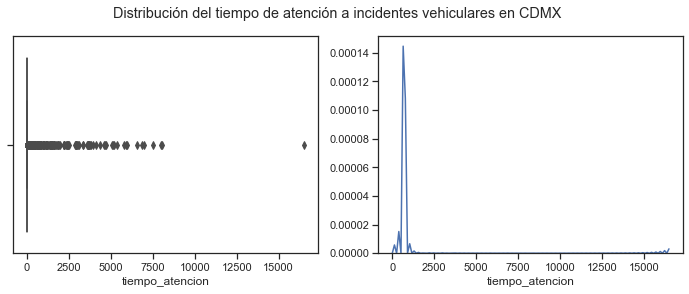

In [97]:
fig, axs = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12,4))

fig.suptitle('Distribución del tiempo de atención a incidentes vehiculares en CDMX')

# Boxplot
sns.boxplot(x=ta, ax=axs[0]);

# Desnity plot
sns.distplot(ta, hist=False, ax=axs[1]);

## 2.1. Filtro de datos atípicos

Se filtran los datos utilizando el rango intercuartílico como parámetro para filtrar los datos atípicos.

In [94]:
ll = ta > tiempo_atencion_percentile_25 - (tiempo_atencion_iq_range * 1.5)
ul = ta < tiempo_atencion_percentile_75 + (tiempo_atencion_iq_range * 1.5)

df_filtered = df_clean[ll & ul]
ta_filtered = df_filtered['tiempo_atencion']

In [95]:
# Porcentaje de datos eliminados por ser atípicos
(1 - (ta_filtered.shape[0]/ta.shape[0]))*100

8.223952339042718

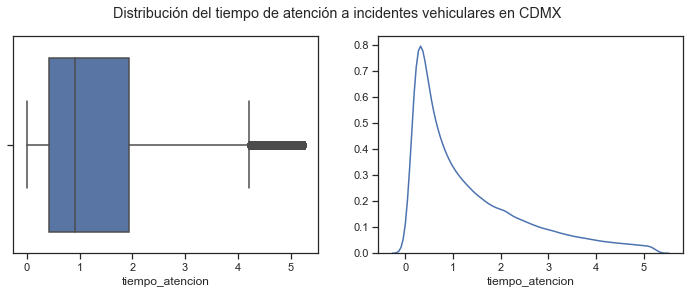

In [96]:
fig, axs = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(12,4))

fig.suptitle('Distribución del tiempo de atención a incidentes vehiculares en CDMX')

# Boxplot
sns.boxplot(x=ta_filtered, ax=axs[0]);

# Desnity plot
sns.distplot(ta_filtered, hist=False, ax=axs[1]);

In [101]:
df_filtered.describe()

,latitud,longitud,tiempo_atencion
count,338906.000000,338906.000000,338906.000000
mean,19.381929,-99.138307,1.334218
std,0.069209,0.062472,1.181696
min,19.095427,-99.370561,0.004722
25%,19.335170,-99.180690,0.416389
50%,19.383070,-99.141370,0.912917
75%,19.432550,-99.096880,1.932500
max,19.579320,-98.945370,5.250556


## 2.2. Análisis de distribución

In [103]:
from scipy.stats import skew, kurtosis

print(f'Curtosis: {kurtosis(ta_filtered)}')
print(f'Asimetría: {skew(ta_filtered)}')

Curtosis: 0.8476598876103325
Asimetría: 1.2497437625678218


Tal como se aprecia en la gráfica de densidad, el tiempo de atención a los incidentes viales tiene una distribución asimétrica cargada a la izquierda con un coeficiente de asimetría mayor a 1.2. La curtosis resultó ser mayor a 0.84, esto implica que hay más dispersión de los datos. 

# 3. 